<a href="https://colab.research.google.com/github/Jeonseungwoo1/first_DeepLearning/blob/main/FasterRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torchvision
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as T

# 사전 학습된 Faster R-CNN 모델 로드
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# 이미지 로드 및 전처리
img_path = "/content/image1.jpeg"  # 이미지 파일 경로
img = Image.open(img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)

# 예측 수행
with torch.no_grad():
    predictions = model([img_tensor])

# 예측 결과에서 바운딩 박스와 레이블, 점수 추출
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# 점수가 0.5 이상인 바운딩 박스만 선택
threshold = 0.5
selected_indices = scores > threshold
boxes = boxes[selected_indices]
labels = labels[selected_indices]
scores = scores[selected_indices]

# 이미지에 바운딩 박스 그리기
draw = ImageDraw.Draw(img)
font = ImageFont.load_default()

for box, label, score in zip(boxes, labels, scores):
    x1, y1, x2, y2 = box
    draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=3)
    draw.text((x1, y1), f"{label.item()}:{score:.2f}", fill="red", font=font)

# 결과 이미지 저장 및 표시
output_path = "result.jpg"
img.save(output_path)
img.show()


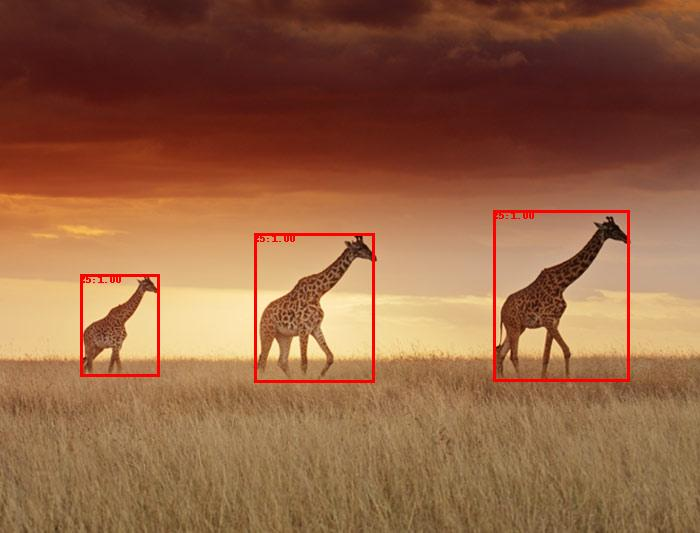

In [6]:
#이미지 출력
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/result.jpg'

img = cv2.imread(img_path)
cv2_imshow(img)
